## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [10]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
LEARNING_RATE = 1e-3
EPOCHS = 5 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [16]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.25, 0.5, 0.75]
redice_lr_patient = [1, 5, 10]


In [17]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.25, reduce_patient: 1
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 10s 195us/step - loss: 2.2326 - accuracy: 0.2625 - val_loss: 2.1226 - val_accuracy: 0.2343
Epoch 2/5
50000/50000 [==============================] - 9s 188us/step - loss: 1.7591 - accuracy: 0.3873 - val_loss: 1.9894 - val_accuracy: 0.3064
Epoch 3/5
50000/50000 [==============================] - 8s 168us/step - loss: 1.6363 - accuracy: 0.4254 - val_loss: 1.8439 - val_accuracy: 0.3641
Epoch 4/5
50000/50000 [==============================] - 9s 172us/step - loss: 1.5644 - accuracy: 0.4515 - val_loss: 1.7379 - val_accuracy: 0.4032
Epoch 5/5
50000/50000 [==============================] - 8s 155us/step - loss: 1.5100 - accuracy: 0.4707 - val_loss: 1.6400 - val_accuracy: 0.4245
Numbers of exp: 4, reduce_factor: 0.50, reduce_patient: 5
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 235us/step - loss: 2.2499 - accuracy: 0.2642 - val_loss: 2.1739 - val_accuracy: 0.1896
Epoch 2/5
50000/50000 [==============================] - 10s 200us/step - loss: 1.7719 - accuracy: 0.3846 - val_loss: 2.0214 - val_accuracy: 0.2797
Epoch 3/5
50000/50000 [==============================] - 11s 222us/step - loss: 1.6430 - accuracy: 0.4229 - val_loss: 1.8447 - val_accuracy: 0.3717
Epoch 4/5
50000/50000 [==============================] - 11s 220us/step - loss: 1.5681 - accuracy: 0.4511 - val_loss: 1.7358 - val_accuracy: 0.4008
Epoch 5/5
50000/50000 [==============================] - 11s 217us/step - loss: 1.5115 - accuracy: 0.4697 - val_loss: 1.6408 - val_accuracy: 0.4242
Numbers of exp: 8, reduce_factor: 0.75, reduce_patient: 10
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 14s 282us/step - loss: 1.7749 - accuracy: 0.3870 - val_loss: 2.6516 - val_accuracy: 0.1514
Epoch 2/5
50000/50000 [==============================] - 11s 220us/step - loss: 1.4708 - accuracy: 0.4829 - val_loss: 1.8142 - val_accuracy: 0.3386
Epoch 3/5
50000/50000 [==============================] - 11s 222us/step - loss: 1.3684 - accuracy: 0.5193 - val_loss: 1.6558 - val_accuracy: 0.4081
Epoch 4/5
50000/50000 [==============================] - 11s 222us/step - loss: 1.2943 - accuracy: 0.5445 - val_loss: 1.5636 - val_accuracy: 0.4423
Epoch 5/5
50000/50000 [==============================] - 13s 251us/step - loss: 1.2347 - accuracy: 0.5675 - val_loss: 1.5126 - val_accuracy: 0.4609
Numbers of exp: 12, reduce_factor: 0.50, reduce_patient: 1
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 16s 325us/step - loss: 1.7656 - accuracy: 0.3856 - val_loss: 2.8298 - val_accuracy: 0.1544
Epoch 2/5
50000/50000 [==============================] - 13s 253us/step - loss: 1.4762 - accuracy: 0.4791 - val_loss: 1.8435 - val_accuracy: 0.3430
Epoch 3/5
50000/50000 [==============================] - 13s 259us/step - loss: 1.3762 - accuracy: 0.5144 - val_loss: 1.7221 - val_accuracy: 0.3854
Epoch 4/5
50000/50000 [==============================] - 11s 230us/step - loss: 1.3024 - accuracy: 0.5396 - val_loss: 1.6339 - val_accuracy: 0.4170
Epoch 5/5
50000/50000 [==============================] - 11s 227us/step - loss: 1.2469 - accuracy: 0.5621 - val_loss: 1.6659 - val_accuracy: 0.4002

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00018750000890577212.
Numbers of exp: 16, reduce_factor: 0.75, reduce_patient: 5
Model: "model_18"
___________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 14s 273us/step - loss: 1.8569 - accuracy: 0.3615 - val_loss: 2.1099 - val_accuracy: 0.2256
Epoch 2/5
50000/50000 [==============================] - 13s 252us/step - loss: 1.5529 - accuracy: 0.4564 - val_loss: 1.9256 - val_accuracy: 0.3376
Epoch 3/5
50000/50000 [==============================] - 14s 276us/step - loss: 1.4410 - accuracy: 0.4939 - val_loss: 1.8201 - val_accuracy: 0.3509
Epoch 4/5
50000/50000 [==============================] - 11s 226us/step - loss: 1.3686 - accuracy: 0.5204 - val_loss: 1.7864 - val_accuracy: 0.3635
Epoch 5/5
50000/50000 [==============================] - 11s 227us/step - loss: 1.3053 - accuracy: 0.5436 - val_loss: 1.6321 - val_accuracy: 0.4204
Numbers of exp: 20, reduce_factor: 0.25, reduce_patient: 10
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 15s 297us/step - loss: 1.8570 - accuracy: 0.3604 - val_loss: 2.1088 - val_accuracy: 0.2348
Epoch 2/5
50000/50000 [==============================] - 12s 231us/step - loss: 1.5575 - accuracy: 0.4522 - val_loss: 1.9084 - val_accuracy: 0.3286
Epoch 3/5
50000/50000 [==============================] - 12s 233us/step - loss: 1.4407 - accuracy: 0.4898 - val_loss: 1.8133 - val_accuracy: 0.3567
Epoch 4/5
50000/50000 [==============================] - 11s 220us/step - loss: 1.3615 - accuracy: 0.5221 - val_loss: 1.6618 - val_accuracy: 0.4218
Epoch 5/5
50000/50000 [==============================] - 12s 241us/step - loss: 1.3014 - accuracy: 0.5440 - val_loss: 1.5953 - val_accuracy: 0.4355
Numbers of exp: 24, reduce_factor: 0.75, reduce_patient: 1
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i

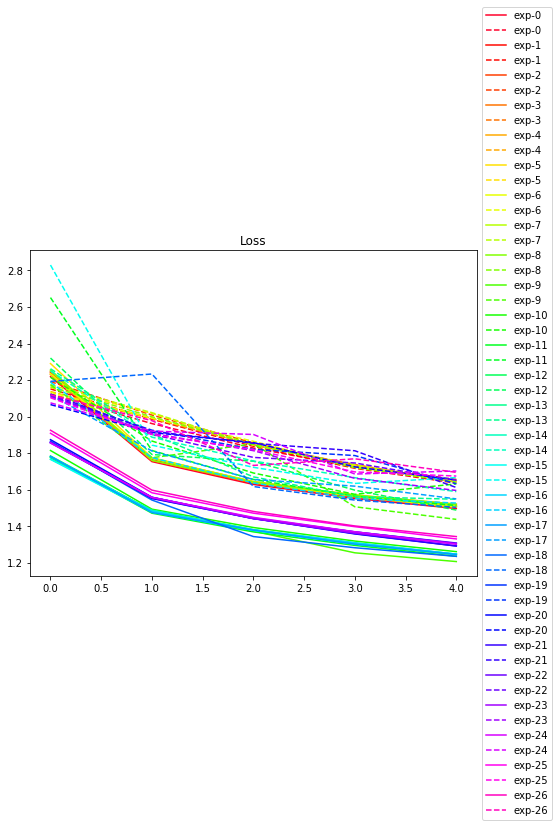

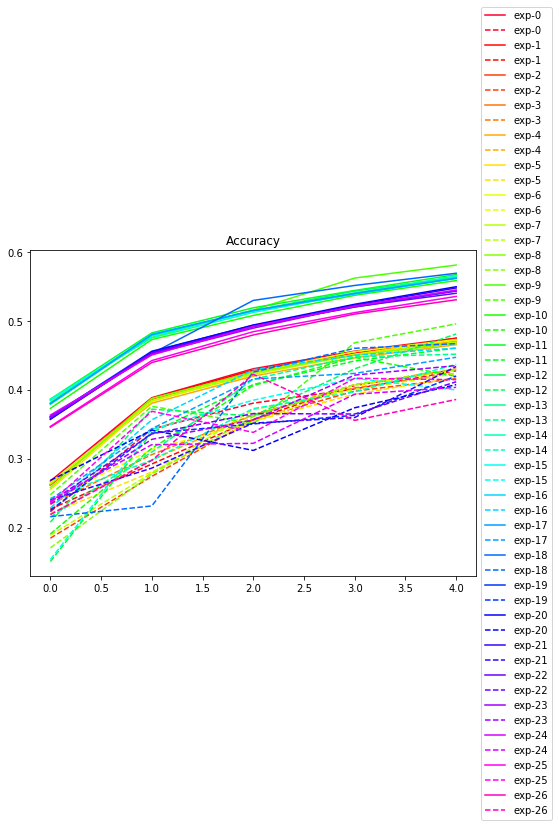

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()